In [1]:
import json
import os
import re
import fnmatch
from PIL import Image
from pathlib import Path
import numpy as np
import cv2
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [61]:
CLASS_NAME = ['airplane', 'car', 'chair', 'guitar', 'mug']

cwd = os.getcwd()
np_dir = cwd + '/output'

In [72]:
n = 5
im = np.load(np_dir + '/image_' + str(n) + '.npy')
annotation = np.load(np_dir + '/annotation_' + str(n) + '.npy')

In [73]:
def vis_bbox(im, dets):
    """Visual debugging of detections."""
    for i in range(dets.shape[0]):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        class_name = CLASS_NAME[int(dets[i, 4]) - 1]
        score = 1.0
        cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
        cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0, 0, 255), thickness=1)
    return im

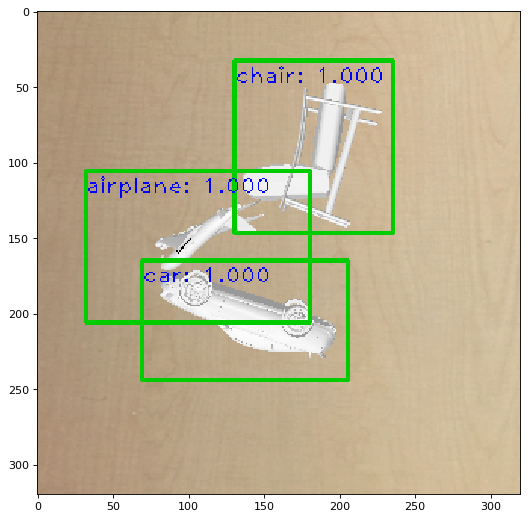

In [74]:
im_annotated = vis_bbox(im, annotation)
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(im_annotated)

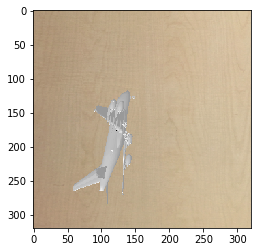

In [77]:
nn = 2
closeup = np.load(np_dir + '/closeup_' + str(n) + '_' + str(nn) + '.npy')
plt.imshow(closeup)